# PROJECE SUBMISSION BY SUJATHA PATEL

# Bank Churn Prediction

### Objective:
Given a Bank customer, build a neural network based classifier that can determine whether they will leave
or not in the next 6 months.

### Context:
Businesses like banks which provide service have to worry about problem of 'Churn' i.e. customers
leaving and joining another service provider. It is important to understand which aspects of the service
influence a customer's decision in this regard. Management can concentrate efforts on improvement of
service, keeping in mind these priorities.

### Data Description:
The case study is from an open-source dataset from Kaggle.
The dataset contains 10,000 sample points with 14 distinct features such as CustomerId, CreditScore,
Geography, Gender, Age, Tenure, Balance etc.

### Link to the Kaggle project site:
https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling

### Points Distribution:
The points distribution for this case is as follows:
1. Read the dataset
2. Drop the columns which are unique for all users like IDs (5 points)
3. Distinguish the features and target variable (5 points)
4. Divide the data set into training and test sets (5 points)
5. Normalize the train and test data (10 points)
6. Initialize & build the model. Identify the points of improvement and implement the same the same.(20)
7. Predict the results using 0.5 as a threshold (10 points)
8. Print the Accuracy score and confusion matrix (5 points)

In [1]:
# conda install tensorflow (run at anaconda3)
# conda install keras  (run at anaconda3)
# conda install seaborn (run at anaconda3)

In [2]:
# customized function to find the skewness, outliers of all columns
def cdescribe(df):
  results = []
  for col in df.select_dtypes(include = ['float64', 'int64']).columns.tolist():
    stats = OrderedDict({'': col, 
                         'Count': df[col].count(), 
                         'Type': df[col].dtype, 
                         'Mean': round(df[col].mean(), 2), 
                         'StdDev': round(df[col].std(), 2), 
                         'Variance': round(df[col].var(), 2), 
                         'Minimum': round(df[col].min(), 2), 
                         'Q1': round(df[col].quantile(0.25), 2), 
                         'Median': round(df[col].median(), 2), 
                         'Q3': round(df[col].quantile(0.75), 2), 
                         'Maximum': round(df[col].max(), 2),
                         'Range': round(df[col].max(), 2)-round(df[col].min(), 2), 
                         'IQR': round(df[col].quantile(0.75), 2)-round(df[col].quantile(0.25), 2),
                         'Kurtosis': round(df[col].kurt(), 2), 
                         'Skewness': round(df[col].skew(), 2), 
                         'MeanAbsDev': round(df[col].mad(), 2)})
    if df[col].skew() < -1:
      if df[col].median() < df[col].mean(): ske = 'Highly Skewed (Right)'      
      else: ske = 'Highly Skewed (Left)'
    elif -1 <= df[col].skew() <= -0.5:
      if df[col].median() < df[col].mean(): ske = 'Moderately Skewed (Right)'
      else: ske = 'Moderately Skewed (Left)'
    elif -0.5 < df[col].skew() <= 0:  
      if df[col].median() < df[col].mean(): ske = 'Fairly Symmetrical (Right)'
      else: ske = 'Fairly Symmetrical (Left)' 
    elif 0 < df[col].skew() <= 0.5:
      if df[col].median() < df[col].mean(): ske = 'Fairly Symmetrical (Right)'
      else: ske = 'Fairly Symmetrical (Left)'
    elif 0.5 < df[col].skew() <= 1:
      if df[col].median() < df[col].mean(): ske = 'Moderately Skewed (Right)'
      else: ske = 'Moderately Skewed (Left)'
    elif df[col].skew() > 1:
      if df[col].median() < df[col].mean(): ske = 'Highly Skewed (Right)'
      else: ske = 'Highly Skewed (Left)'
    else:
      ske = 'Error'
    stats['SkewnessComment'] = ske
    upper_lim, lower_lim = stats['Q3'] + (1.5 * stats['IQR']), stats['Q1'] - (1.5 * stats['IQR'])
    if len([x for x in df[col] if x < lower_lim or x > upper_lim])>1:
      out = 'HasOutliers'
    else:
      out = 'NoOutliers'
    stats['OutliersComment'] = out
    results.append(stats)
    if df[col].median() > df[col].mean():
       med_mean = "more than"
    elif df[col].median() < df[col].mean():
       med_mean = "less than"
    else:
       med_mean = "same as"

    # Printi the descriptive statistics report for all the columns in concrete dataset
    print(f'\n{col} - Data ranges between {round(df[col].min(),2)} to {round(df[col].max(),2)}, while 25th and 75th percentile is spread between {round(df[col].quantile(0.25),2)} to {round(df[col].quantile(0.75),2)}. Median {round(df[col].median(),2)} is {med_mean} than Mean {round(df[col].mean(),2)} which means cement is {ske}. Column has {out}.')
  
  describe = pd.DataFrame(results).set_index('')
              
  return display(describe.T)

def unique(df): 
  
    # intilize a null list 
    unique_list = [] 
      
    # traverse for all elements 
    for x in df.columns: 
        print(x,df[x].nunique())
        

def bdplots(df, col):
    f,(ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (15, 7))
    
    # Boxplot to check outliers
    sns.boxplot(x = col, data = df, ax = ax1, orient = 'v', color = 'lightblue')
    
    # Distribution plot with outliers
    sns.distplot(df[col], ax = ax2, color = 'teal', fit = norm, rug = True).set_title(f'{col} with outliers')
    ax2.axvline(df[col].mean(), color = 'r', linestyle = '--', label = 'Mean', linewidth = 1.2)
    ax2.axvline(df[col].median(), color = 'g', linestyle = '--', label = 'Median', linewidth = 1.2)
    ax2.axvline(df[col].mode()[0], color = 'b', linestyle = '--', label = 'Mode', linewidth = 1.2); ax2.legend(loc = 'best')
    
    # Removing outliers, but in a new dataframe
    upperbound, lowerbound = np.percentile(df[col], [1, 99])
    y = pd.DataFrame(np.clip(df[col], upperbound, lowerbound))
    
    # Distribution plot without outliers
    sns.distplot(y[col], ax = ax3, color = 'tab:orange', fit = norm, rug = True).set_title(f'{col} without outliers')
    ax3.axvline(y[col].mean(), color = 'r', linestyle = '--', label = 'Mean', linewidth = 1.2)
    ax3.axvline(y[col].median(), color = 'g', linestyle = '--', label = 'Median', linewidth = 1.2)
    ax3.axvline(y[col].mode()[0], color = 'b', linestyle = '--', label = 'Mode', linewidth = 1.2); ax3.legend(loc = 'best')
    
    kwargs = {'fontsize':14, 'color':'blue'}
    ax1.set_title(col + ' Boxplot Analysis', **kwargs)
    ax1.set_xlabel('Box', **kwargs)
    ax1.set_ylabel(col + ' Values', **kwargs)

    return plt.show()

num_features = ['']
def find_outlier(df, num_features):
    q25 = df[num_features].quantile(0.25)
    q75 = df[num_features].quantile(0.75)
    iqr = q75-q25 #Interquartile range
    lower, upper  = q25-1.5*iqr, q75+1.5*iqr
    outliers_df = df[(df[num_features] < lower) | (df[num_features] > upper)]
    outliers_removed_df = df[(df[num_features] >= lower) & (df[num_features] <= upper)]
    
    print(' \'{}\': {} /{}'.format(
        num_features, outliers_df.shape[0], outliers_removed_df.shape[0]))


In [3]:
#Importing the libraries
import numpy as np
np.set_printoptions(threshold=np.inf)
import seaborn as sns
import pandas as pd
from collections import OrderedDict
from scipy import stats; from scipy.stats import zscore, norm, randint

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

import tensorflow as tf

import matplotlib.pyplot as plt
import matplotlib.style as style; style.use('fivethirtyeight')
%matplotlib inline


C:\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is 

### Read the dataset

In [4]:
#Importing the dataset
dataset = pd.read_csv('bank.csv')
dataset.columns
dataset.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


In [5]:
dataset.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

#### No null values present in the dataset. 

### Distinguish the features and target variable 

The information of each client were key factors in determining the outcome, which is the dependent variable if the client is likely to stay or leave the bank. The ANN model outputs whether a particular client is likely to stay or leave the bank based on its independent variables, as it outputs either a 1 or 0. The number 1 is outputted if the client is classified as high risk of leaving the bank, and in contrary, a 0 is outputted if the client is likely to stay with the bank.

In [6]:
target='Exited'
non_features=[target]
cat_features = list(dataset.select_dtypes(include=['object']))
num_features=[col for col in dataset.select_dtypes(np.number).columns if col not in non_features]

In [7]:
# Outliers vs No Outliers
for feature in num_features:
    find_outlier(dataset, feature)

 'RowNumber': 0 /10000
 'CustomerId': 0 /10000
 'CreditScore': 15 /9985
 'Age': 359 /9641
 'Tenure': 0 /10000
 'Balance': 0 /10000
 'NumOfProducts': 60 /9940
 'HasCrCard': 0 /10000
 'IsActiveMember': 0 /10000
 'EstimatedSalary': 0 /10000


### Copy the dataset

Now I needed to identify the matrix of features which is essentially the indexes that is going to be included in the input layer of the artifical neural network. This is justified on which independent variables will have the most impact on the output. I used common logic in determining that independent variables such as 'customerId', 'Surname' and 'RowNumber' will have no impact on the dependent (output) variable. In this case, I used all the information in between columns 3-13 as my matrix of features.

However, when the artificial neural network is being trained, it will be able to identify which variables actually have the most impact on the output from the matrix of features and will assign larger weights to those variables on the networks synapses.

In [8]:
#drop off the unique columns RowNumber, CustomerID and also the Surname which do not add value for the analysis
dataset1 = dataset.copy()
dataset1.drop('RowNumber',axis=1,inplace=True)
dataset1.drop('CustomerId',axis=1,inplace=True)
dataset1.drop('Surname',axis=1,inplace=True)

In [9]:
# Remove duplicate rows (not removing the duplicates) /* There is no duplicates*/
print('Number of rows before discarding duplicates = %d' % (dataset.shape[0]))
dataset1.drop_duplicates(subset = None, keep = 'first', inplace=True)
print('Number of rows after discarding duplicates = %d' % (dataset1.shape[0]))

Number of rows before discarding duplicates = 10000
Number of rows after discarding duplicates = 10000


In [10]:
# Let us further analyze the descriptive statistics of the dataset (customzied)
cdescribe(dataset1)


CreditScore - Data ranges between 350 to 850, while 25th and 75th percentile is spread between 584.0 to 718.0. Median 652.0 is more than than Mean 650.53 which means cement is Fairly Symmetrical (Left). Column has HasOutliers.

Age - Data ranges between 18 to 92, while 25th and 75th percentile is spread between 32.0 to 44.0. Median 37.0 is less than than Mean 38.92 which means cement is Highly Skewed (Right). Column has HasOutliers.

Tenure - Data ranges between 0 to 10, while 25th and 75th percentile is spread between 3.0 to 7.0. Median 5.0 is less than than Mean 5.01 which means cement is Fairly Symmetrical (Right). Column has NoOutliers.

Balance - Data ranges between 0.0 to 250898.09, while 25th and 75th percentile is spread between 0.0 to 127644.24. Median 97198.54 is more than than Mean 76485.89 which means cement is Fairly Symmetrical (Left). Column has NoOutliers.

NumOfProducts - Data ranges between 1 to 4, while 25th and 75th percentile is spread between 1.0 to 2.0. Median 1

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
Count,10000,10000,10000,10000,10000,10000,10000,10000,10000
Type,int64,int64,int64,float64,int64,int64,int64,float64,int64
Mean,650.53,38.92,5.01,76485.9,1.53,0.71,0.52,100090,0.2
StdDev,96.65,10.49,2.89,62397.4,0.58,0.46,0.5,57510.5,0.4
Variance,9341.86,109.99,8.36,3.89344e+09,0.34,0.21,0.25,3.30746e+09,0.16
Minimum,350,18,0,0,1,0,0,11.58,0
Q1,584,32,3,0,1,0,0,51002.1,0
Median,652,37,5,97198.5,1,1,1,100194,0
Q3,718,44,7,127644,2,1,1,149388,0
Maximum,850,92,10,250898,4,1,1,199992,1


Based on descriptive statistics, Age has got the Outliers and we will analyze further for normalizing the data.

C:\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

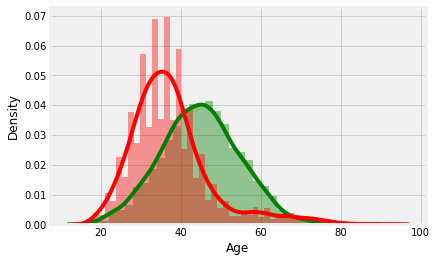

In [11]:
# Distribution of Age Group by Target Value
sns.distplot(dataset1[dataset1.Exited == 1]['Age'], color = 'g')
sns.distplot(dataset1[dataset1.Exited == 0]['Age'], color = 'r')

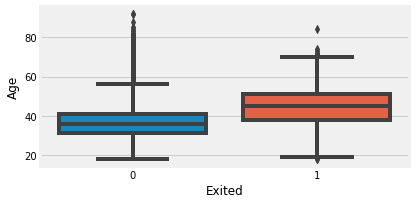

In [12]:
# Checking Outliers by Target column
num_features=['Age']
plt.figure(figsize=(20,10))
for i,col in enumerate(num_features,start=1):
    plt.subplot(3,3,i);
    sns.boxplot(y=dataset1[col],x=dataset1['Exited']);
plt.show()

Boxplot, distribution of columns with and without outliers
------------------------------------------------------------------------------------------------------------------------
Age column 
Number of rows with outliers: 359


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
58,511,Spain,Female,66,4,0.00,1,1,0,1643.11,1
85,652,Spain,Female,75,10,0.00,2,1,1,114675.75,0
104,670,Spain,Female,65,1,0.00,1,1,1,177655.68,1
158,646,France,Female,73,6,97259.25,1,0,1,104719.66,0
181,510,France,Male,65,2,0.00,2,1,1,48071.61,0
...,...,...,...,...,...,...,...,...,...,...,...
9753,656,Germany,Male,68,7,153545.11,1,1,1,186574.68,0
9765,445,France,Male,64,2,136770.67,1,0,1,43678.06,0
9832,595,Germany,Female,64,2,105736.32,1,1,1,89935.73,1
9894,521,France,Female,77,6,0.00,2,1,1,49054.10,0


C:\anaconda3\lib\site-packages\seaborn\_core.py:1303: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
C:\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\anaconda3\lib\site-packages\seaborn\distributions.py:2055: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
C:\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or

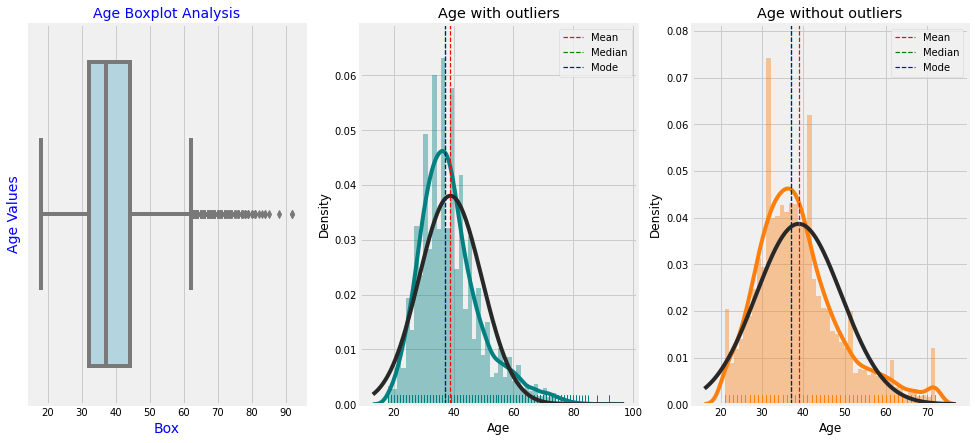

In [13]:
print('Boxplot, distribution of columns with and without outliers'); print('--'*60)
columns = ['Age']

for i in columns:
    Q3 = dataset1[i].quantile(0.75) 
    Q1 = dataset1[i].quantile(0.25)
    IQR = Q3 - Q1

    no_outlier = len(dataset1.loc[(dataset1[i] < (Q1 - 1.5 * IQR)) | (dataset1[i] > (Q3 + 1.5 * IQR))])
    print(f'{i.capitalize()} column \nNumber of rows with outliers: {no_outlier}')
    
    # print the outlier rows
    if (no_outlier > 0):
        display(dataset1.loc[(dataset1[i] < (Q1 - 1.5 * IQR)) | (dataset1[i] > (Q3 + 1.5 * IQR))].head(no_outlier)) 
    bdplots(dataset1, i)

del i, Q1, Q3, IQR, columns, no_outlier

In [14]:
withOutliers = ['Age']    
 
iqr   = dataset1[withOutliers].describe().T['75%']-dataset1[withOutliers].describe().T['25%']
q1    = dataset1[withOutliers].describe().T['25%']-(iqr*1.5)
q3    = dataset1[withOutliers].describe().T['75%']+(iqr*1.5)

for i in withOutliers:
    dataset1[i][dataset1[i]>q3[i]]=q3[i]
    dataset1[i][dataset1[i]<q1[i]]=q1[i]

C:\anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


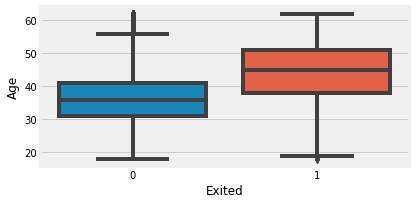

In [15]:
# Checking Outliers by Target column
num_features=['Age']
plt.figure(figsize=(20,10))
for i,col in enumerate(num_features,start=1):
    plt.subplot(3,3,i);
    sns.boxplot(y=dataset1[col],x=dataset1['Exited']);
plt.show()

In [16]:
#segregate input and output variables 

X = dataset1.iloc[:,:10]
y = dataset1.iloc[:,10]
X

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77
9997,709,France,Female,36,7,0.00,1,0,1,42085.58
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52


#### One Hot Encoding: Dataaset contains tow categorical variables 'GENDER' and 'GEOGRAPHY'. Categories values are of string datatype and are an essential feature in model training, so using one-hot encoding values are being transformed into numerial values

In [17]:
print(X['Geography'].unique())

['France' 'Spain' 'Germany']


In [18]:
print(X['Gender'].unique())

['Female' 'Male']


In [19]:
#Convert X & Y variable to a categorical variable as relevant

X['Geography'] = X['Geography'].astype('category')
X['Gender'] = X['Gender'].astype('category')
    
X['Geography'] = X['Geography'].replace({1: 'France', 2: 'Germany', 3: 'Spain'})
X['Gender'] = X['Gender'].replace({0:'Male', 1: 'Female'}) 

X = pd.get_dummies(X, drop_first=True)
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0


### Divide the data set into training and test sets 

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(8000, 11) (2000, 11) (8000,) (2000,)


### Normalize train/test data

Feature Scaling: It's a technique perform to standardize the independent input features. Feature scaling is done to avoid the dominance of one feature over the other and is useful in avoiding hte prediction results

In [21]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

X_train and X_test are now scaled and will be used to train and test the model

### Initialize & build the model. Identify the points of improvement and implement the same the same.

### Creating our Artificial Neural Network!

In [22]:
#Import Keras Library and packages
import keras
import sys
from keras.models import Sequential #to initialize NN
from keras.layers import Dense #used to create layers in NN

Using TensorFlow backend.


Randomly initialize with the weights with small numbers close to zero but not zero. 

    
Distribute features of the first observation, from our dataset, per each node in the input layer. Thus, eleven independent variables will be added to our input layer.
    

In [23]:
#Initializing the ANN - Defining as a sequence of layers or a Graph 
classifier = Sequential()

Adding the input layer
* units - number of nodes to add to the hidden layer. units should be the average of nodes in the input layer (11 nodes) and the number of nodes in the output layer (1 node), for this case is 11+1/2 = 6

* Kernal_initializer - randomly initialize the weight with small numbers close to zero, according to uniform distribution.

* activation - Activation function.

* input_dim - number of nodes in the input layer, that our hidden layer should be expective

In [24]:
#input layer
classifier.add(Dense(units=6,kernel_initializer = 'uniform', activation='relu',input_dim=11))

- Forward-Propagation: From the input to the output the neurons are activated, and the impact they have in the predicted results is measured by the assigned wieghts. Depending on the number of hidden layers, the system propagates the activation until getting the predicted result y.
        
- To define the first hidden layer, we firstly will have to define an activation function. The best one is the Rectifier Function and we'll choose this one for the hidden layers. Further more also by using a Sigmoid function to the output layer will allow us to calculate the probabilities of the different class(leaving or staying the bank). In the end, we will be able to rand the customers by their probability to leave the bank.

Adding Second hidden layer

In [25]:
classifier.add(Dense(units=6,kernel_initializer='uniform',activation='relu'))

Adding Output Layer
- units - one node in the output layer
- activation - if there are more than two categories in the output we would use the softmax

In [26]:
classifier.add(Dense(units=1,kernel_initializer='uniform',activation='sigmoid'))

- Cost Function: Meausre the generated error by comparing the predicted value with the true value.

- Compiling the ANN

- optimizer - algorithm to use to find the best weights that will make our system powerful.

- loss - Loss function within our optimizer algorithm

- metric - criteria to evaluate the model

In [27]:
classifier.compile(optimizer='adam',loss="binary_crossentropy",metrics=['accuracy'])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [28]:
#model is trained over 100 epochs
model = classifier.fit(X_train,y_train,validation_split=0.2,batch_size=10,epochs=100)


Train on 6400 samples, validate on 1600 samples
Epoch 1/100
6400/6400 [==============================] - 1s 110us/step - loss: 0.4888 - accuracy: 0.7953 - val_loss: 0.4387 - val_accuracy: 0.7969
Epoch 2/100
6400/6400 [==============================] - 1s 89us/step - loss: 0.4295 - accuracy: 0.7958 - val_loss: 0.4324 - val_accuracy: 0.7969
Epoch 3/100
6400/6400 [==============================] - 1s 90us/step - loss: 0.4259 - accuracy: 0.7958 - val_loss: 0.4281 - val_accuracy: 0.7969
Epoch 4/100
6400/6400 [==============================] - 1s 89us/step - loss: 0.4224 - accuracy: 0.7958 - val_loss: 0.4241 - val_accuracy: 0.7969
Epoch 5/100
6400/6400 [==============================] - 1s 90us/step - loss: 0.4197 - accuracy: 0.8155 - val_loss: 0.4216 - val_accuracy: 0.8269
Epoch 6/100
6400/6400 [==============================] - 1s 90us/step - loss: 0.4170 - accuracy: 0.8263 - val_loss: 0.4198 - val_accuracy: 0.8244
Epoch 7/100
6400/6400 [==============================] - 1s 91us/step - lo

6400/6400 [==============================] - 1s 100us/step - loss: 0.4027 - accuracy: 0.8350 - val_loss: 0.4115 - val_accuracy: 0.8300
Epoch 56/100
6400/6400 [==============================] - 1s 114us/step - loss: 0.4029 - accuracy: 0.8356 - val_loss: 0.4097 - val_accuracy: 0.8269
Epoch 57/100
6400/6400 [==============================] - 1s 102us/step - loss: 0.4026 - accuracy: 0.8338 - val_loss: 0.4096 - val_accuracy: 0.8300
Epoch 58/100
6400/6400 [==============================] - 1s 101us/step - loss: 0.4026 - accuracy: 0.8355 - val_loss: 0.4098 - val_accuracy: 0.8325
Epoch 59/100
6400/6400 [==============================] - 1s 104us/step - loss: 0.4029 - accuracy: 0.8356 - val_loss: 0.4091 - val_accuracy: 0.8294
Epoch 60/100
6400/6400 [==============================] - 1s 103us/step - loss: 0.4026 - accuracy: 0.8345 - val_loss: 0.4106 - val_accuracy: 0.8294
Epoch 61/100
6400/6400 [==============================] - 1s 100us/step - loss: 0.4030 - accuracy: 0.8363 - val_loss: 0.4094 

This is our trained ANN model which, after running 100 epochs on the training set, returned an accuracy of around 83.3%

As we can see with the 100th EPOCH loss is minimized and the accuracy has increased.

### Prediction and Model Score / Accuracy

Making Predictions

We've trained our ANN model and now we're ready to see its capability on predicting future churn results with our test set.

Predicting the Test set results
If the test set that the deep neural network has not been trained on, gets the same percentage of accuracy of 84% as the training set before, it validates that our model has a high accuracy and is stable.

I implemented the classifier predict method so the DNN could predict all the probabilities that the 2000 customers of the test set would leave the bank.

However, I needed to also implement a threshold to get results for which customers were the highest risk. This is why I inputted a threshold of 0.5 to get me this result. If the predicted probability was above 0.5 the DNN outputted a True and if it was below the DNN outputted a False. This means that any customer having a predicted probability above 0.5 was a high risk of leaving the bank, and vice versa anything below was not.



In [30]:
# Prediction variable
y_pred = classifier.predict(X_test)

# Model score calculation
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred.astype('int'),y_test.astype('int'))
print(score)

0.7975


### Predicting the Test set results at 0.5 Threshold

In [31]:
#Predicting the Test set results 
y_pred = classifier.predict(X_test)

#Threshold of 
y_pred = (y_pred > 0.5)

y_pred

array([[False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [

According to our model the first five customer will not leave the bank while the sixth on the rank will.
Again the next three customer will not leave and the tenth customer ont the rank will and so on...


### Predict for one new example
Geography: France
Credit Score: 600
Tenure: 3
Gender: Male
Age: 40
Balance: 60000
Number of Products: 2
Has Credit Card: Yes
Is Active Member: Yes
Estimated Salary: 50000

In [32]:
new_rec = sc.transform(np.array([[0.0, 0, 600, 1, 40, 3, 60000, 2, 1, 1, 50000]]))
new_pred = classifier.predict(new_rec)
new_pred = (new_pred > 0.5)
new_pred

array([[False]])

### Evaluating ANN

In [33]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score

In [36]:
#optimizer - adam
def build_classifier():
    classifier = Sequential()
    classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu', input_dim = 11))
    classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu'))
    classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
    classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
    return classifier
classifier = KerasClassifier(build_fn = build_classifier, batch_size = 10, epochs = 100)
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10, n_jobs = 3)                             

In [37]:
mean = accuracies.mean()
variance = accuracies.std()
print("[For optimizer: adam]","mean:",mean," variance:",variance)

[For optimizer: adam] mean: 0.8446250021457672  variance: 0.021643787333396194


In [40]:
#optimizer - rmsprop
def build_classifier():
    classifier = Sequential()
    classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu', input_dim = 11))
    classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu'))
    classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
    classifier.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy', metrics = ['accuracy'])
    return classifier
classifier = KerasClassifier(build_fn = build_classifier, batch_size = 10, epochs = 100)
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10, n_jobs = 3)   

In [41]:
mean = accuracies.mean()
variance = accuracies.std()
print("[For optimizer: rmsprop]","mean:",mean," variance:",variance)

[For optimizer: rmsprop] mean: 0.8465000033378601  variance: 0.01626730074207485


### Improving the ANN(Dropout)

Since rmsprop is having higher accuracy mean, we shall consider rmsprop in our further analysis

In [42]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

In [43]:
classifier = Sequential()

classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu', input_dim = 11))
classifier.add(Dropout(rate = 0.1))

classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu'))
classifier.add(Dropout(rate = 0.1))

classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

classifier.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy', metrics = ['accuracy'])

model = classifier.fit(X_train, y_train, batch_size = 10, epochs = 100)

Epoch 1/100
8000/8000 [==============================] - 1s 94us/step - loss: 0.5002 - accuracy: 0.7958
Epoch 2/100
8000/8000 [==============================] - 1s 84us/step - loss: 0.4399 - accuracy: 0.7960
Epoch 3/100
8000/8000 [==============================] - 1s 83us/step - loss: 0.4341 - accuracy: 0.7960
Epoch 4/100
8000/8000 [==============================] - 1s 84us/step - loss: 0.4307 - accuracy: 0.7960
Epoch 5/100
8000/8000 [==============================] - 1s 88us/step - loss: 0.4290 - accuracy: 0.7960
Epoch 6/100
8000/8000 [==============================] - 1s 82us/step - loss: 0.4281 - accuracy: 0.8071
Epoch 7/100
8000/8000 [==============================] - 1s 83us/step - loss: 0.4275 - accuracy: 0.8202
Epoch 8/100
8000/8000 [==============================] - 1s 84us/step - loss: 0.4285 - accuracy: 0.8241
Epoch 9/100
8000/8000 [==============================] - 1s 80us/step - loss: 0.4289 - accuracy: 0.8278
Epoch 10/100
8000/8000 [==============================] - 1s 81u

8000/8000 [==============================] - 1s 85us/step - loss: 0.4218 - accuracy: 0.8299
Epoch 80/100
8000/8000 [==============================] - 1s 84us/step - loss: 0.4239 - accuracy: 0.8295
Epoch 81/100
8000/8000 [==============================] - 1s 83us/step - loss: 0.4257 - accuracy: 0.8273
Epoch 82/100
8000/8000 [==============================] - 1s 83us/step - loss: 0.4232 - accuracy: 0.8296
Epoch 83/100
8000/8000 [==============================] - 1s 84us/step - loss: 0.4226 - accuracy: 0.8306
Epoch 84/100
8000/8000 [==============================] - 1s 83us/step - loss: 0.4244 - accuracy: 0.8321
Epoch 85/100
8000/8000 [==============================] - 1s 83us/step - loss: 0.4270 - accuracy: 0.8295
Epoch 86/100
8000/8000 [==============================] - 1s 84us/step - loss: 0.4211 - accuracy: 0.8304
Epoch 87/100
8000/8000 [==============================] - 1s 84us/step - loss: 0.4274 - accuracy: 0.8298
Epoch 88/100
8000/8000 [==============================] - 1s 84us/st

### Improving the ANN

In [44]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV

In [45]:
def build_classifier(optimizer):
    classifier = Sequential()
    classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu', input_dim = 11))
    classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu'))
    classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
    classifier.compile(optimizer = optimizer, loss = 'binary_crossentropy', metrics = ['accuracy'])
    return classifier
classifier = KerasClassifier(build_fn = build_classifier)

run with the below parameters and it was running very long..... to complate. 
parameters = {
    'batch_size': [25, 32],
    'epochs': [100, 500],
    'optimizer': ['adam', 'rmsprop']
}
Based on the results, i have chosen the best parameter as batch_size: 25, epochs=500, optimizer = rmsprop

In [49]:
parameters = {
    'batch_size': [25,32],
    'epochs': [100,500],
    'optimizer': ['adam','rmsprop']
}

In [51]:
grid_search = GridSearchCV(estimator = classifier, param_grid = parameters, scoring = 'accuracy', cv = 5)

In [ ]:
grid_search.fit(X_train, y_train)

Epoch 1/100
6400/6400 [==============================] - 0s 55us/step - loss: 0.5744 - accuracy: 0.7977
Epoch 2/100
6400/6400 [==============================] - 0s 34us/step - loss: 0.4344 - accuracy: 0.7980
Epoch 3/100
6400/6400 [==============================] - 0s 34us/step - loss: 0.4286 - accuracy: 0.7980
Epoch 4/100
6400/6400 [==============================] - 0s 34us/step - loss: 0.4257 - accuracy: 0.7980
Epoch 5/100
6400/6400 [==============================] - 0s 33us/step - loss: 0.4231 - accuracy: 0.7980
Epoch 6/100
6400/6400 [==============================] - 0s 34us/step - loss: 0.4211 - accuracy: 0.7980
Epoch 7/100
6400/6400 [==============================] - 0s 34us/step - loss: 0.4192 - accuracy: 0.7980
Epoch 8/100
6400/6400 [==============================] - 0s 33us/step - loss: 0.4178 - accuracy: 0.8166
Epoch 9/100
6400/6400 [==============================] - 0s 34us/step - loss: 0.4167 - accuracy: 0.8219
Epoch 10/100
6400/6400 [==============================] - 0s 34u

6400/6400 [==============================] - 0s 33us/step - loss: 0.4023 - accuracy: 0.8358
Epoch 80/100
6400/6400 [==============================] - 0s 32us/step - loss: 0.4019 - accuracy: 0.8342
Epoch 81/100
6400/6400 [==============================] - 0s 32us/step - loss: 0.4022 - accuracy: 0.8347
Epoch 82/100
6400/6400 [==============================] - 0s 32us/step - loss: 0.4023 - accuracy: 0.8341
Epoch 83/100
6400/6400 [==============================] - 0s 32us/step - loss: 0.4022 - accuracy: 0.8345
Epoch 84/100
6400/6400 [==============================] - 0s 36us/step - loss: 0.4018 - accuracy: 0.8347
Epoch 85/100
6400/6400 [==============================] - 0s 35us/step - loss: 0.4020 - accuracy: 0.8363
Epoch 86/100
6400/6400 [==============================] - 0s 31us/step - loss: 0.4017 - accuracy: 0.8339
Epoch 87/100
6400/6400 [==============================] - 0s 32us/step - loss: 0.4018 - accuracy: 0.8352
Epoch 88/100
6400/6400 [==============================] - 0s 31us/st

6400/6400 [==============================] - 0s 42us/step - loss: 0.3936 - accuracy: 0.8366
Epoch 58/100
6400/6400 [==============================] - 0s 39us/step - loss: 0.3930 - accuracy: 0.8370
Epoch 59/100
6400/6400 [==============================] - 0s 40us/step - loss: 0.3930 - accuracy: 0.8363
Epoch 60/100
6400/6400 [==============================] - 0s 39us/step - loss: 0.3933 - accuracy: 0.8377
Epoch 61/100
6400/6400 [==============================] - 0s 37us/step - loss: 0.3930 - accuracy: 0.8369
Epoch 62/100
6400/6400 [==============================] - 0s 39us/step - loss: 0.3930 - accuracy: 0.8370
Epoch 63/100
6400/6400 [==============================] - 0s 39us/step - loss: 0.3928 - accuracy: 0.8373
Epoch 64/100
6400/6400 [==============================] - 0s 39us/step - loss: 0.3925 - accuracy: 0.8377
Epoch 65/100
6400/6400 [==============================] - 0s 39us/step - loss: 0.3922 - accuracy: 0.8373
Epoch 66/100
6400/6400 [==============================] - 0s 38us/st

6400/6400 [==============================] - 0s 38us/step - loss: 0.3542 - accuracy: 0.8569
Epoch 35/100
6400/6400 [==============================] - 0s 38us/step - loss: 0.3530 - accuracy: 0.8548
Epoch 36/100
6400/6400 [==============================] - 0s 36us/step - loss: 0.3527 - accuracy: 0.8575
Epoch 37/100
6400/6400 [==============================] - 0s 39us/step - loss: 0.3519 - accuracy: 0.8581
Epoch 38/100
6400/6400 [==============================] - 0s 39us/step - loss: 0.3515 - accuracy: 0.8581
Epoch 39/100
6400/6400 [==============================] - 0s 39us/step - loss: 0.3513 - accuracy: 0.8598
Epoch 40/100
6400/6400 [==============================] - 0s 40us/step - loss: 0.3506 - accuracy: 0.8600
Epoch 41/100
6400/6400 [==============================] - 0s 39us/step - loss: 0.3491 - accuracy: 0.8581
Epoch 42/100
6400/6400 [==============================] - 0s 38us/step - loss: 0.3486 - accuracy: 0.8586
Epoch 43/100
6400/6400 [==============================] - 0s 48us/st

6400/6400 [==============================] - 0s 38us/step - loss: 0.3948 - accuracy: 0.8325
Epoch 13/100
6400/6400 [==============================] - 0s 38us/step - loss: 0.3925 - accuracy: 0.8338
Epoch 14/100
6400/6400 [==============================] - 0s 38us/step - loss: 0.3893 - accuracy: 0.8328
Epoch 15/100
6400/6400 [==============================] - 0s 37us/step - loss: 0.3866 - accuracy: 0.8328
Epoch 16/100
6400/6400 [==============================] - 0s 38us/step - loss: 0.3833 - accuracy: 0.8334
Epoch 17/100
6400/6400 [==============================] - 0s 40us/step - loss: 0.3800 - accuracy: 0.8356
Epoch 18/100
6400/6400 [==============================] - 0s 38us/step - loss: 0.3777 - accuracy: 0.8391
Epoch 19/100
6400/6400 [==============================] - 0s 38us/step - loss: 0.3752 - accuracy: 0.8408
Epoch 20/100
6400/6400 [==============================] - 0s 38us/step - loss: 0.3736 - accuracy: 0.8423
Epoch 21/100
6400/6400 [==============================] - 0s 37us/st

6400/6400 [==============================] - 0s 40us/step - loss: 0.3399 - accuracy: 0.8616
Epoch 91/100
6400/6400 [==============================] - 0s 38us/step - loss: 0.3403 - accuracy: 0.8609
Epoch 92/100
6400/6400 [==============================] - 0s 38us/step - loss: 0.3393 - accuracy: 0.8623
Epoch 93/100
6400/6400 [==============================] - 0s 38us/step - loss: 0.3395 - accuracy: 0.8606
Epoch 94/100
6400/6400 [==============================] - 0s 38us/step - loss: 0.3403 - accuracy: 0.8592
Epoch 95/100
6400/6400 [==============================] - 0s 43us/step - loss: 0.3399 - accuracy: 0.8597
Epoch 96/100
6400/6400 [==============================] - 0s 39us/step - loss: 0.3400 - accuracy: 0.8600
Epoch 97/100
6400/6400 [==============================] - 0s 40us/step - loss: 0.3401 - accuracy: 0.8614
Epoch 98/100
6400/6400 [==============================] - 0s 42us/step - loss: 0.3396 - accuracy: 0.8591
Epoch 99/100
6400/6400 [==============================] - 0s 42us/st

6400/6400 [==============================] - 0s 41us/step - loss: 0.4015 - accuracy: 0.8364
Epoch 69/100
6400/6400 [==============================] - 0s 40us/step - loss: 0.4013 - accuracy: 0.8358
Epoch 70/100
6400/6400 [==============================] - 0s 39us/step - loss: 0.4011 - accuracy: 0.8359
Epoch 71/100
6400/6400 [==============================] - 0s 39us/step - loss: 0.4015 - accuracy: 0.8345
Epoch 72/100
6400/6400 [==============================] - 0s 41us/step - loss: 0.4012 - accuracy: 0.8361
Epoch 73/100
6400/6400 [==============================] - 0s 41us/step - loss: 0.4008 - accuracy: 0.8366
Epoch 74/100
6400/6400 [==============================] - 0s 39us/step - loss: 0.4011 - accuracy: 0.8369
Epoch 75/100
6400/6400 [==============================] - 0s 38us/step - loss: 0.4014 - accuracy: 0.8363
Epoch 76/100
6400/6400 [==============================] - 0s 40us/step - loss: 0.4008 - accuracy: 0.8364
Epoch 77/100
6400/6400 [==============================] - 0s 41us/st

6400/6400 [==============================] - 0s 39us/step - loss: 0.4049 - accuracy: 0.8359
Epoch 47/100
6400/6400 [==============================] - 0s 35us/step - loss: 0.4042 - accuracy: 0.8344
Epoch 48/100
6400/6400 [==============================] - 0s 38us/step - loss: 0.4046 - accuracy: 0.8353
Epoch 49/100
6400/6400 [==============================] - 0s 37us/step - loss: 0.4041 - accuracy: 0.8358
Epoch 50/100
6400/6400 [==============================] - 0s 35us/step - loss: 0.4042 - accuracy: 0.8345
Epoch 51/100
6400/6400 [==============================] - 0s 34us/step - loss: 0.4040 - accuracy: 0.8342
Epoch 52/100
6400/6400 [==============================] - 0s 35us/step - loss: 0.4038 - accuracy: 0.8350
Epoch 53/100
6400/6400 [==============================] - 0s 39us/step - loss: 0.4040 - accuracy: 0.8339
Epoch 54/100
6400/6400 [==============================] - 0s 37us/step - loss: 0.4041 - accuracy: 0.8341
Epoch 55/100
6400/6400 [==============================] - 0s 48us/st

6400/6400 [==============================] - 0s 42us/step - loss: 0.4072 - accuracy: 0.8356
Epoch 24/100
6400/6400 [==============================] - 0s 41us/step - loss: 0.4069 - accuracy: 0.8350
Epoch 25/100
6400/6400 [==============================] - 0s 39us/step - loss: 0.4062 - accuracy: 0.8363
Epoch 26/100
6400/6400 [==============================] - 0s 39us/step - loss: 0.4061 - accuracy: 0.8359
Epoch 27/100
6400/6400 [==============================] - 0s 40us/step - loss: 0.4059 - accuracy: 0.8375
Epoch 28/100
6400/6400 [==============================] - 0s 47us/step - loss: 0.4057 - accuracy: 0.8359
Epoch 29/100
6400/6400 [==============================] - 0s 51us/step - loss: 0.4054 - accuracy: 0.8353
Epoch 30/100
6400/6400 [==============================] - 0s 50us/step - loss: 0.4051 - accuracy: 0.8356
Epoch 31/100
6400/6400 [==============================] - 0s 50us/step - loss: 0.4048 - accuracy: 0.8369
Epoch 32/100
6400/6400 [==============================] - 0s 50us/st

6400/6400 [==============================] - 0s 38us/step - loss: 0.3990 - accuracy: 0.8334
Epoch 1/100
6400/6400 [==============================] - 0s 61us/step - loss: 0.6054 - accuracy: 0.7891
Epoch 2/100
6400/6400 [==============================] - 0s 38us/step - loss: 0.4564 - accuracy: 0.7917
Epoch 3/100
6400/6400 [==============================] - 0s 38us/step - loss: 0.4330 - accuracy: 0.7919
Epoch 4/100
6400/6400 [==============================] - 0s 36us/step - loss: 0.4258 - accuracy: 0.8120
Epoch 5/100
6400/6400 [==============================] - 0s 37us/step - loss: 0.4205 - accuracy: 0.8233
Epoch 6/100
6400/6400 [==============================] - 0s 39us/step - loss: 0.4161 - accuracy: 0.8248
Epoch 7/100
6400/6400 [==============================] - 0s 38us/step - loss: 0.4116 - accuracy: 0.8264
Epoch 8/100
6400/6400 [==============================] - 0s 37us/step - loss: 0.4071 - accuracy: 0.8263
Epoch 9/100
6400/6400 [==============================] - 0s 36us/step - loss

6400/6400 [==============================] - 0s 41us/step - loss: 0.3443 - accuracy: 0.8609
Epoch 79/100
6400/6400 [==============================] - 0s 39us/step - loss: 0.3442 - accuracy: 0.8603
Epoch 80/100
6400/6400 [==============================] - 0s 41us/step - loss: 0.3439 - accuracy: 0.8623
Epoch 81/100
6400/6400 [==============================] - 0s 40us/step - loss: 0.3448 - accuracy: 0.8623
Epoch 82/100
6400/6400 [==============================] - 0s 39us/step - loss: 0.3439 - accuracy: 0.8620
Epoch 83/100
6400/6400 [==============================] - 0s 39us/step - loss: 0.3444 - accuracy: 0.8611
Epoch 84/100
6400/6400 [==============================] - 0s 40us/step - loss: 0.3434 - accuracy: 0.8620
Epoch 85/100
6400/6400 [==============================] - 0s 43us/step - loss: 0.3436 - accuracy: 0.8606
Epoch 86/100
6400/6400 [==============================] - 0s 43us/step - loss: 0.3440 - accuracy: 0.8623
Epoch 87/100
6400/6400 [==============================] - 0s 41us/st

6400/6400 [==============================] - 0s 55us/step - loss: 0.3959 - accuracy: 0.8369
Epoch 56/100
6400/6400 [==============================] - 0s 44us/step - loss: 0.3957 - accuracy: 0.8373
Epoch 57/100
6400/6400 [==============================] - 0s 40us/step - loss: 0.3956 - accuracy: 0.8383
Epoch 58/100
6400/6400 [==============================] - 0s 42us/step - loss: 0.3957 - accuracy: 0.8366
Epoch 59/100
6400/6400 [==============================] - 0s 38us/step - loss: 0.3954 - accuracy: 0.8381
Epoch 60/100
6400/6400 [==============================] - 0s 37us/step - loss: 0.3953 - accuracy: 0.8384
Epoch 61/100
6400/6400 [==============================] - 0s 38us/step - loss: 0.3953 - accuracy: 0.8378
Epoch 62/100
6400/6400 [==============================] - 0s 36us/step - loss: 0.3950 - accuracy: 0.8378
Epoch 63/100
6400/6400 [==============================] - 0s 41us/step - loss: 0.3948 - accuracy: 0.8372
Epoch 64/100
6400/6400 [==============================] - 0s 40us/st

In [ ]:
best_parameters = model.best_params_
best_accuracy = model.best_score_
print("best_parameters:",best_parameters,"\nbest_accuracy:",best_accuracy)

In [ ]:
classifier.compile(optimizer='rmsprop',loss="binary_crossentropy",metrics=['accuracy'])

In [ ]:
#model is trained over 100 epochs
model = classifier.fit(X_train,y_train,validation_split=0.2,batch_size=25,epochs=500)

### Classification Report and Confusion matrix Plotting

### Visualise loss and accuracy

In [ ]:
#Accuracy vs value accuracy
model.history.keys()
# summarize history for accuracy
plt.plot(model.history['accuracy'])
plt.plot(model.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'],
loc='upper left')
plt.show()


In [ ]:
#Loss vs value loss
plt.plot(model.history['loss'])
plt.plot(model.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend(['train','test'],
loc='upper left')
plt.show()


confusion matrix and plotting: The confusion matrix is a two-dimensional array comparing predicted category labels to the true label. For binary classificaiton, these are the True Positive, True Negative, False Positive, and False Negative categories.

In [ ]:
conf_matrix = confusion_matrix(y_test.astype('int'),y_pred.astype('int'))
sns.heatmap(conf_matrix,
            annot=True,
            fmt="d",
            square=True, 
            xticklabels=["not churn","churn"],
            yticklabels=["not churn","churn"],
            linewidths=2,
            linecolor="w",
            cmap="Set1")
plt.subplots_adjust(wspace=.3,hspace=.3)

A Classification report is used to measure the quality of predictions from a classfication algorithm. How many predictions are Tre and how many are False. More specifically, True Positive, False Positives, True Negatives and False Negatives.

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test.astype('int'),y_pred.astype('int')))

Implications:

Banks could use this model on their own data and figure out the top 19.5% of their customers who are the most likely to leave the bank and use data mining to analyze those particular customers information. Analyzing this information can lead the bank into finding a similarity between the customers who were at the highest probability of leaving and take action to keep those customers.

# END OF PROJECT